## Creating the Neural Network Model
We're going to be working first with the MNIST dataset, which is a dataset that contains 60,000 training samples and 10,000 testing samples of hand-written and labeled digits, 0 through 9, so ten total "classes."  

This is a very small dataset in terms of what you would be working with in any realistic setting, but it should also be small enough to work on everyone's computers.  

### About the dataset
- The MNIST dataset has the images, which we'll be working with as purely black and white, thresholded, images, of size 28 x 28, or 784 pixels total.  
- Our features will be the pixel values for each pixel, thresholded. Either the pixel is "blank" (0), or there is something (1).  

We're going to attempt to just use this extremely rudimentary data, and predict the number we're looking at (a 0,1,2,3,4,5,6,7,8, or 9). We're hoping that our neural network will somehow create an inner-model of the relationships between pixels, and be able to look at new examples of digits and predict them to a high degree.

Lets import tensorflow and prepare the data

In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

When we're working with our own collected data, chances are, it won't be packaged up so nicely, and we may have to spend a bit more time and effort on this step. 

Here, `x_train` data is the "features". In this case, the features are pixel values of the 28x28 images of these digits 0-9.  
The `y_train` is the label (is it a 0,1,2,3,4,5,6,7,8 or a 9?)

The testing variants of these variables is the "out of sample" examples that we will use. These are examples from our data that we're going to set aside, reserving them for testing the model.

Neural networks are exceptionally good at fitting to data, so much so that they will commonly over-fit the data. Our real hope is that the neural network doesn't just memorize our data and that it instead "generalizes" and learns the actual problem and patterns associated with it.

Let's look at this actual data:

In [2]:
# print(x_train[0])

The output doesn't seem to be meaningful for our eyes. Lets visualize the data

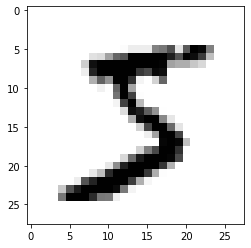

In [3]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

Looks like a `5`. Lets confirm

In [4]:
print(y_train[0])

5


It's generally a good idea to "normalize" our data. This typically involves scaling the data to be between 0 and 1, or maybe -1 and positive 1.  
In our case, each "pixel" is a feature, and each feature currently ranges from 0 to 255. Not quite 0 to 1. Let's change that with a handy utility function

In [5]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

Lets look at the data now

In [9]:
# print(x_train[0])

# plt.imshow(x_train[0],cmap=plt.cm.binary)
# plt.show()

Now its between `0` and `1`

Now let's build our model!  

- A sequential model is what we're going to use most of the time. It just means things are going to go in direct order. A feed forward model. No going backwards.  
- Next, we'll add layers. We need to take this 28x28 image, and make it a flat 1x784 for the input layer. There are many ways for us to do this, but keras has a Flatten layer built just for us, so we'll use that.  
- Next, we want our hidden layers. We're going to go with the simplest neural network layer, which is just a Dense layer. This refers to the fact that it's a densely-connected layer, meaning it's "fully connected," where each node connects to each prior and subsequent node.  
- The layer we add will have 128 units. The activation function is *relu*, short for rectified linear. Currently, *relu* is the activation function you should just default to. There are many more to test for sure, but, if you don't know what to use, use relu to start.  
- We will also add another identical layer for good measure.
- Finally we add an output layer. It should have 10 nodes - one node per possible number prediction. In this case, our activation function is a softmax function, since we're really actually looking for something more like a probability distribution of which of the possible prediction options this thing we're passing features through of is. 

In [11]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

Now we need to "compile" the model. This is where we pass the settings for actually optimizing/training the model we've defined.  
Similar to *relu* activation function, *adam* is a good optimizer to start with as default.  
Next, we have our loss metric. Loss is a calculation of error. A neural network doesn't actually attempt to **maximize accuracy**. It attempts to **minimize loss**. Again, there are many choices, but some form of categorical crossentropy is a good start for a classification task like this.

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train

In [14]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0562 - accuracy: 0.9820
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0425 - accuracy: 0.9861
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0325 - accuracy: 0.9894


## Test
Getting a high accuracy and low loss might mean our model learned how to classify digits in general (it generalized) or it simply memorized every single example we showed it (it overfit). This is why we need to test on out-of-sample data (data we didn't use to train the model).

In [15]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0879 - accuracy: 0.9761
0.08789397031068802
0.9761000275611877


## Saving Model
We can save our model adn use it in the future instead of training again

In [16]:
model.save('epic_num_reader.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: epic_num_reader.model\assets


In [17]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

## Predict

In [19]:
predictions = new_model.predict(x_test)
# print(predictions)

Again, not much readable since these are probability distributions. We can get the actual number pretty simply using numpy's argmax function

In [23]:
import numpy as np

print(np.argmax(predictions[0]))

7


Lets verify if the prediction is correct

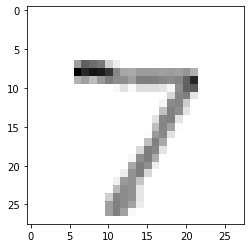

In [24]:
plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()